<a href="https://colab.research.google.com/github/jumbokh/Computer-Vision/blob/main/notebooks/face_recognition_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python numpy face-recognition pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=dfe1cd0de3b4ac3c41e29a36ef76dcc1a5fabfc25bdc8d07af187b24c77e1d30
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
import cv2
import numpy as np
import face_recognition

In [3]:
known_face_list = [
    {
        'name': 'Hyun Bin',
        'filename': '玄彬.jpeg',
        'encode': None,
    },
    {
        'name': 'Son Ye Jin',
        'filename': '孫藝珍.jpeg',
        'encode': None,
    },
]

In [4]:
for data in known_face_list:
    img = cv2.imread(data['filename'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data['encode'] = face_recognition.face_encodings(img)[0]

In [5]:
print(known_face_list)

[{'name': 'Hyun Bin', 'filename': '玄彬.jpeg', 'encode': array([-0.08651309,  0.06846064,  0.01379022, -0.04790942, -0.10520209,
       -0.01443347, -0.05256783, -0.08204318,  0.09023466, -0.12680285,
        0.22686046, -0.04506062, -0.23215058, -0.07286069, -0.08212633,
        0.15572877, -0.24256968, -0.11950361, -0.00280707, -0.00422573,
        0.15066439,  0.01953107, -0.05022003,  0.06412393, -0.081804  ,
       -0.27911788, -0.12573853, -0.05137144,  0.01510414, -0.07447946,
       -0.06937285,  0.01074798, -0.23828477, -0.07061595,  0.01149343,
        0.06063452, -0.00652332, -0.04536196,  0.13675599,  0.00050911,
       -0.19022208,  0.11284052,  0.04637415,  0.21616387,  0.2013008 ,
        0.10669813, -0.03938222, -0.15070453,  0.12085696, -0.16712108,
        0.08270009,  0.17163146,  0.11716791,  0.07006668, -0.03214698,
       -0.16542733,  0.02069804,  0.10446212, -0.14576089,  0.04066482,
        0.09109622, -0.10929947,  0.05081862, -0.07660019,  0.17448083,
        0

In [6]:
known_face_encodes = [data['encode'] for data in known_face_list]
tolerance = 0.6

In [7]:
test_fn_list = ['孫藝珍-t1.jpeg', '孫藝珍-t2.jpeg', '孫藝珍-t3.jpeg', '玄彬+孫藝珍.jpeg']

In [8]:
for fn in test_fn_list:
    img = cv2.imread(fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    cur_face_locs = face_recognition.face_locations(img)
    cur_face_encodes = face_recognition.face_encodings(img, cur_face_locs)

    for cur_face_encode in cur_face_encodes:
        face_distance_list = face_recognition.face_distance(known_face_encodes, cur_face_encode)

        min_distance_index = np.argmin(face_distance_list)
        if face_distance_list[min_distance_index] < tolerance:
            result = known_face_list[min_distance_index]['name']
        else:
            result = 'unknown'

        distance_with_name_list = [(face_data['name'], round(distance, 4)) for face_data, distance in zip(known_face_list, face_distance_list)]
        print(f'辨識檔案: {fn}, 辨識結果: {result}, 特徵距離: {distance_with_name_list}')

辨識檔案: 孫藝珍-t1.jpeg, 辨識結果: Son Ye Jin, 特徵距離: [('Hyun Bin', 0.5223), ('Son Ye Jin', 0.3378)]
辨識檔案: 孫藝珍-t2.jpeg, 辨識結果: Son Ye Jin, 特徵距離: [('Hyun Bin', 0.5709), ('Son Ye Jin', 0.3927)]
辨識檔案: 孫藝珍-t3.jpeg, 辨識結果: Son Ye Jin, 特徵距離: [('Hyun Bin', 0.6045), ('Son Ye Jin', 0.4161)]
辨識檔案: 玄彬+孫藝珍.jpeg, 辨識結果: Hyun Bin, 特徵距離: [('Hyun Bin', 0.3312), ('Son Ye Jin', 0.5504)]
辨識檔案: 玄彬+孫藝珍.jpeg, 辨識結果: Son Ye Jin, 特徵距離: [('Hyun Bin', 0.552), ('Son Ye Jin', 0.3583)]


In [9]:
RED_COLOR = (200, 58, 76)
WHITE_COLOR = (255, 255, 255)

def draw_locations(img, match_results):
    for match_result in match_results:
        y1, x2, y2, x1 = match_result['location']
        cv2.rectangle(img, (x1, y1), (x2, y2), RED_COLOR, 2)
        cv2.rectangle(img, (x1, y2 + 35), (x2, y2), RED_COLOR, cv2.FILLED)
        cv2.putText(img, match_result['name'], (x1 + 10, y2 + 25), cv2.FONT_HERSHEY_COMPLEX, 0.8, WHITE_COLOR, 2)

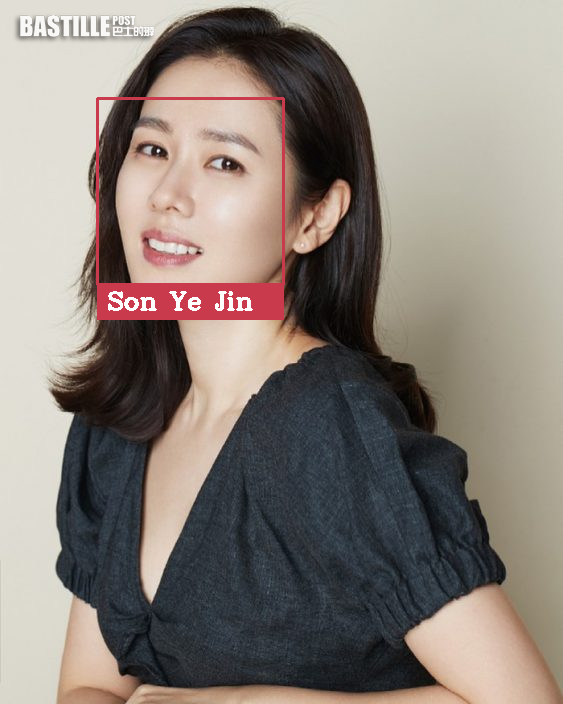

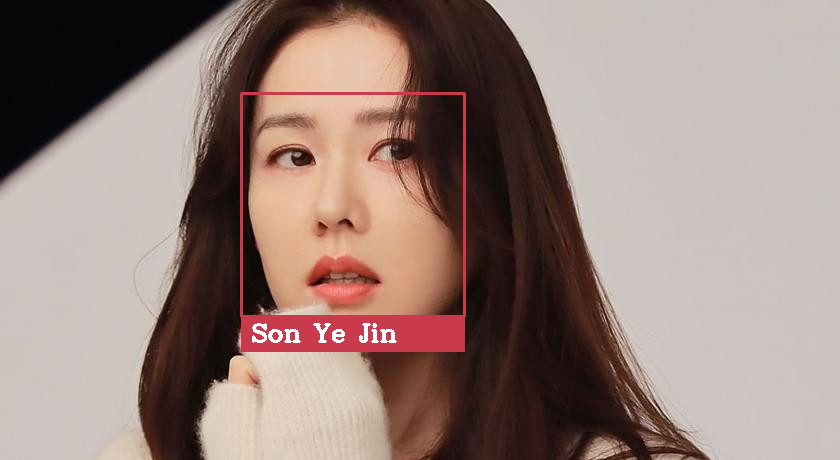

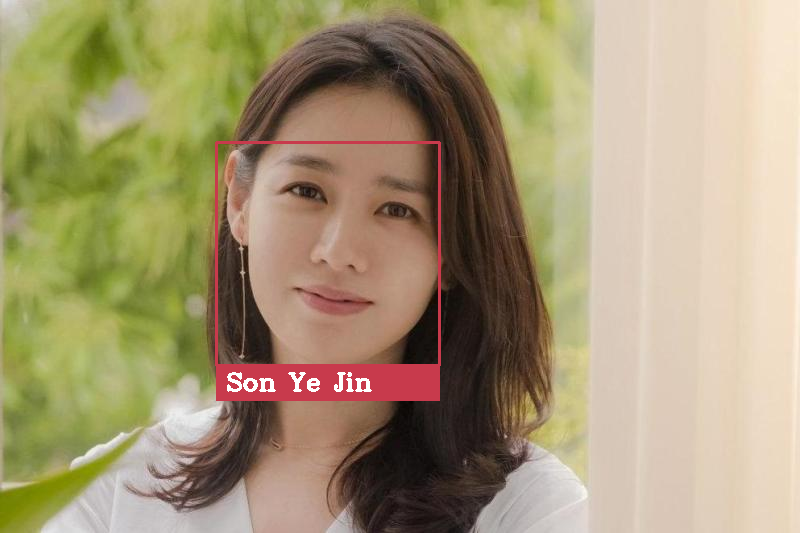

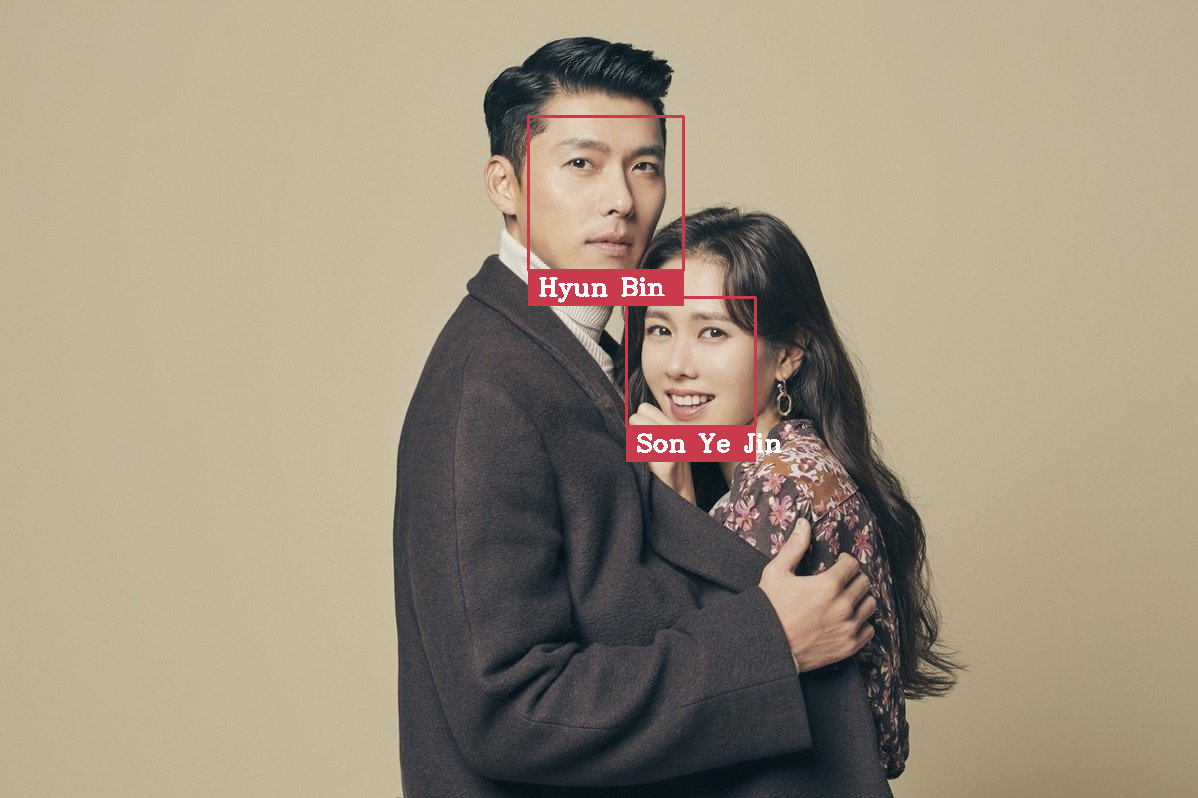

In [10]:
from IPython.display import display
from PIL import Image

for fn in test_fn_list:
    match_results = []

    img = cv2.imread(fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    cur_face_locs = face_recognition.face_locations(img)
    cur_face_encodes = face_recognition.face_encodings(img, cur_face_locs)

    for cur_face_encode, cur_face_loc in zip(cur_face_encodes, cur_face_locs):
        face_distance_list = face_recognition.face_distance(known_face_encodes, cur_face_encode)

        min_distance_index = np.argmin(face_distance_list)
        if face_distance_list[min_distance_index] < tolerance:
            name = known_face_list[min_distance_index]['name']
        else:
            name = 'unknown'

        match_results.append({
            'name': name,
            'location': cur_face_loc,
        })

    draw_locations(img, match_results)
    display(Image.fromarray(img))